In [88]:
import torch
import torch.utils.data as data
import torchvision

import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import random

In [27]:
datasets_path = "/gpfs/fs2/scratch/mdoyley_lab/GPU_VA/DL_dataset/"


In [28]:
class UltrasoundSegmentation(data.Dataset):
    def __init__(self, folder_path):
        super(UltrasoundSegmentation, self).__init__()
        self.img_files = glob.glob(os.path.join(folder_path,'bmode','*.png'))
        self.mask_files = []
        for img_path in self.img_files:
             self.mask_files.append(os.path.join(folder_path,'mask',os.path.basename(img_path)))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data =  cv2.imread(img_path)
            label = cv2.imread(mask_path)
            return torch.from_numpy(data).float(), torch.from_numpy(label).float()

    def __len__(self):
        return len(self.img_files)

In [61]:
train_folder = datasets_path + "train/"
test_folder = datasets_path + "/test/"

train_set = UltrasoundSegmentation(train_folder)
test_set = UltrasoundSegmentation(test_folder)

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=64,
                 shuffle=False)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=64,
                shuffle=False)
print ("Number of training examples: " + str(train_set.__len__()))
print ("Number of testing examples: " + str(test_set.__len__()))

In [92]:
dataiter = iter(train_loader)
bmode, mask = dataiter.next()
def imshow(bmode, mask):
    n = random.randint(0, 64)
    sample_bmode = bmode[n].int()
    sample_mask = mask[n].int()
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(sample_bmode)
    axarr[1].imshow(sample_mask)


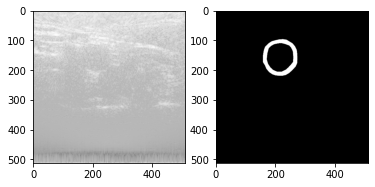

In [107]:
imshow(bmode, mask)